In [36]:
import pandas as pd
df=pd.read_csv("/content/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [38]:
df.shape

(5572, 2)

In [39]:
df.isnull().sum()

,0
Category,0
Message,0


In [40]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [41]:
X = df[['Message']]
y = df['Category']

In [42]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [43]:
y

,Category
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
5567,spam
5568,ham
5569,ham
5570,ham


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [45]:
x_train.shape

(3900, 1)

In [46]:
x_test.shape

(1672, 1)

In [47]:
y_train.shape

(3900,)

In [48]:
y_test.shape

(1672,)

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
text_transformer = CountVectorizer()
preprocessor = ColumnTransformer(
    transformers=[
        ('message', text_transformer, 'Message')
    ]
)


In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB())
])

In [51]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('message', CountVectorizer(),
                                                  'Message')])),
                ('classifier', MultinomialNB())])

In [52]:
y_pred=model.predict(x_test)

In [53]:
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [54]:
y_test

,Category
1065,ham
4845,spam
2753,ham
1472,ham
5067,ham
...,...
891,ham
5408,ham
4343,ham
4092,ham


In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9844497607655502

In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[1446,    3],
       [  23,  200]])

Text(95.72222222222221, 0.5, 'Truth')

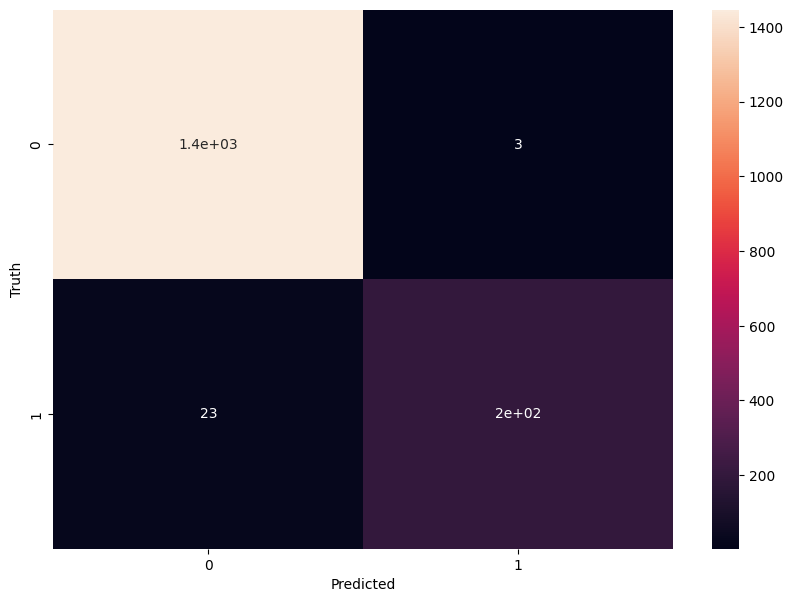

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [59]:
emails = [
  'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
new_data = pd.DataFrame({'Message': emails})
data=model.predict(new_data)
if(data[0]=='spam'):
  print("This is the spam email")
else:
  print("This is not a spam m")

This is the spam email
